# Praca domowa I, zadanie II





## Treść

### Wstęp fabularny

Wyobraź sobie, że jesteś pracownikiem w firmie sprzedającej kompleksową usługę tworzenia wizerunków medialnych. Oddział, w którym pracujesz obsługuje ważnego klienta działającego w branży gier i usług cyfrowych.

Twoim zadaniem jest przygotować model uczenia maszynowego, który określać będzie nastawienie emocjonalne postów z Twittera. Zespół odpowiadający za zbieranie danych właśnie dostarczył zestaw danych dla Ciebie.

Do tej pory klasyfikowaniem nastrojów z twittów zajmował się zespół ekspertów. Rozwiązanie takie jest bardzo wolne i drogie, a dokładność ekspertów wynosi tylko 95%. Dlatego zarząd firmy zlecił wdrożenie modelu uczenia maszynowego.

Twój model stanowić będzie jedynie część większego produktu oferowanego przez Twoją firmę. Wyniki Twojego modelu będą bezpośrednio wykorzystywane przez następny zespół, którego zadaniem jest przygotować kolejny model uczenia maszynowego przewidujący reakcje opinii publicznej na posty klienta.

Prace zespołu, który korzystać będzie z Twojego modelu są już bardzo zaawansowane, dlatego nie może on pozwolić sobie na żadne dodatkowe zmiany w swoim projekcie. Absolutnie konieczne jest, aby Twój model przyporządkowywał posty do jednej z trzech klas 'Positive', 'Negative', 'Neutral' lub analogicznych. Posty nie na temat powinny być klasyfikowane jako 'Neutral'.

Notebook z Twoim projektem będzie oglądał Twój szef, więc koniecznie zadbaj, żeby znalazły się w nim najważniejsze przemyślenia, a rysunki były ładne.

Powodzenia 🦾

### Polecenia

1. Wstępna obróbka danych:

 - załaduj zbiór treningowy i testowy,
 - usuń wiersze o brakujących elementach,
 - w kolumnie `sentiment` zamień wartości `'Irrelevant'` na `'Neutral'`.

1. Wykonaj wizualizacje danych:

 - histogram tematów twittów (`entity`),
 - histogram nastawień (`sentiment`),
 - najczęściej padających słów w treści twittów (`content`).

1. Przygotuj dane:

 - przygotuj zbiór cech poprzez wektoryzacje kolumny `content`, 
 - przygotuj etykiety poprzez zakodowanie tekstowych wartości w kolumnie `sentiment` do postaci liczbowej.

  Następnie wytrenuj naiwny model bayesowski. Sprawdź działanie modelu na kilku własnoręcznie napisanych wiadomościach. 

1. Wytrenuj modele:
 - naiwny bayesowski,
 - liniowy SVM,
 - regresji logistycznej,
 - drzewo decyzyjne.

  Sprawdź model na danych treningowych (walidacja krzyżowa) i testowych, następnie wybierz najlepszy model. Uzasadnij swój wybór.
  
1. Zespół ekspertów ręcznie klasyfikuje dane z dokładnością 95%. Porównaj z nimi swój model i napisz jakie są przewagi Twojego modelu.

### Zbiór danych

Zbiór danych został przygotowany na podstawie zbioru [Twitter Sentiment Analysis](https://www.kaggle.com/jp797498e/twitter-entity-sentiment-analysis) i składa się z dwóch plików:
-  `twitter_training.csv` - zbiór treningowy,
- `twitter_validation.csv` - zbiór testowy.

Archiwum z plikami można pobrać z [dysku google](https://drive.google.com/file/d/1sw2vA87fmAI5V5Xl9k-PCSdN5XwydhOB/view?usp=sharing) lub odkomentowując poniższe linie:

In [1]:
import time
start_time = time.time()

In [2]:
! pip install gdown
! gdown https://drive.google.com/uc?id=1sw2vA87fmAI5V5Xl9k-PCSdN5XwydhOB
! unzip twitter.zip

zsh:1: no matches found: https://drive.google.com/uc?id=1sw2vA87fmAI5V5Xl9k-PCSdN5XwydhOB
unzip:  cannot find or open twitter.zip, twitter.zip.zip or twitter.zip.ZIP.


In [3]:
!pip install -U wordcloud
!pip install -U nltk
!pip install -U scikit-learn
!pip install -U pandas
!pip install -U seaborn
!pip install -U numpy
!pip install -U pydot

Requirement already up-to-date: wordcloud in /Users/k4cp3rskiii/opt/anaconda3/lib/python3.8/site-packages (1.8.1)
Requirement already up-to-date: nltk in /Users/k4cp3rskiii/opt/anaconda3/lib/python3.8/site-packages (3.6.7)
Requirement already up-to-date: scikit-learn in /Users/k4cp3rskiii/opt/anaconda3/lib/python3.8/site-packages (1.0.2)
     |████████████████████████████████| 11.4 MB 2.1 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Requirement already up-to-date: seaborn in /Users/k4cp3rskiii/opt/anaconda3/lib/python3.8/site-packages (0.11.2)
     |████████████████████████████████| 17.6 MB 2.0 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
Requirement already up-to-date: pydot in /Users/k4cp3rskiii/opt/anaconda3/lib/python3.8/site-packages (1.4

# Rozwiązanie

#### Notebook u mnie liczy się ok 16 min 

In [4]:
# Impoty 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_validate
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/k4cp3rskiii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/k4cp3rskiii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Ładowanie danych

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
print('Zainstalowana wersja scikit-learn: {}.'.format(sklearn.__version__))

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10) # aby wykresy w Colabie były większe

import numpy as np
from scipy import diag, interp
from itertools import cycle

from sklearn.model_selection import StratifiedKFold, train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

Zainstalowana wersja scikit-learn: 1.0.2.


In [6]:
train_data = pd.read_csv('twitter_training.csv')
test_data = pd.read_csv('twitter_validation.csv')

In [8]:
train_data.columns

Index(['id', 'entity', 'sentiment', 'content'], dtype='object')

## Preprocessing danych

### Zmieniamy labelki na integerowe

In [42]:
# Przydzielamy klasom integerowe labelki

# Neutral = Class 0
train_data.loc[train_data['sentiment'] == 'Positive', 'sentiment'] = 0
# Positive = Class 1
train_data.loc[train_data['sentiment'] == 'Neutral', 'sentiment'] = 1
# Negative = Class 2
train_data.loc[train_data['sentiment'] == 'Negative', 'sentiment'] = 2
# Irrelevant = Class 1
train_data.loc[train_data['sentiment'] == 'Irrelevant', 'sentiment'] = 1

# A teraz to samo dla zbiotu testowego

# Neutral = Class 0
test_data.loc[test_data['sentiment'] == 'Positive', 'sentiment'] = 0
# Positive = Class 1
test_data.loc[test_data['sentiment'] == 'Neutral', 'sentiment'] = 1
# Negative = Class 2
test_data.loc[test_data['sentiment'] == 'Negative', 'sentiment'] = 2
# Irrelevant = Class 1
test_data.loc[test_data['sentiment'] == 'Irrelevant', 'sentiment'] = 1

In [43]:
train_data = train_data.drop(columns='id')
test_data = test_data.drop(columns='id')

# Pozbywamy się wierszy z niepełnymi informacjani (NaN)
train_data = train_data.dropna(axis='rows', how='all')
test_data = test_data.dropna(axis='rows', how='all')

### Wizualizacja danych, oraz najczęściej występujących słów w tweetach danych kategorii

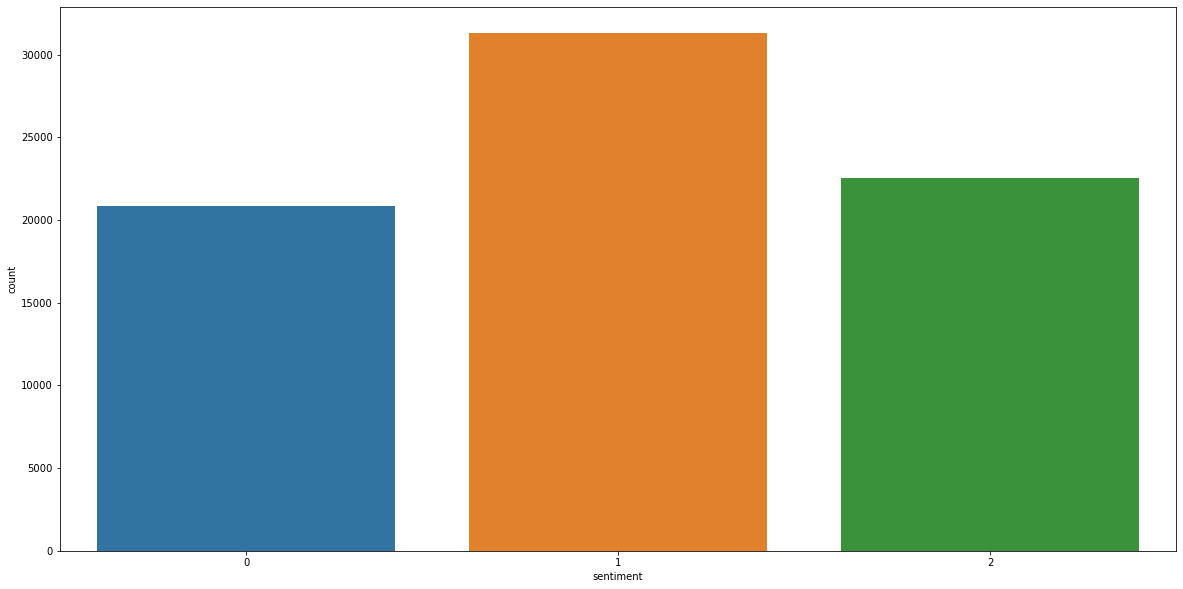

In [44]:
f = sns.countplot(x='sentiment', data=train_data)

Jak widzimy globalnie klasy są w miare zbalansowane, liczebność nie różni się więcej jak 2-krotnie. W związku z tym wydaje się, że nie ma potrzeby sztucznego wyrównywania ich liczebności i można przejść do dalszego etapu preprocessingu danych

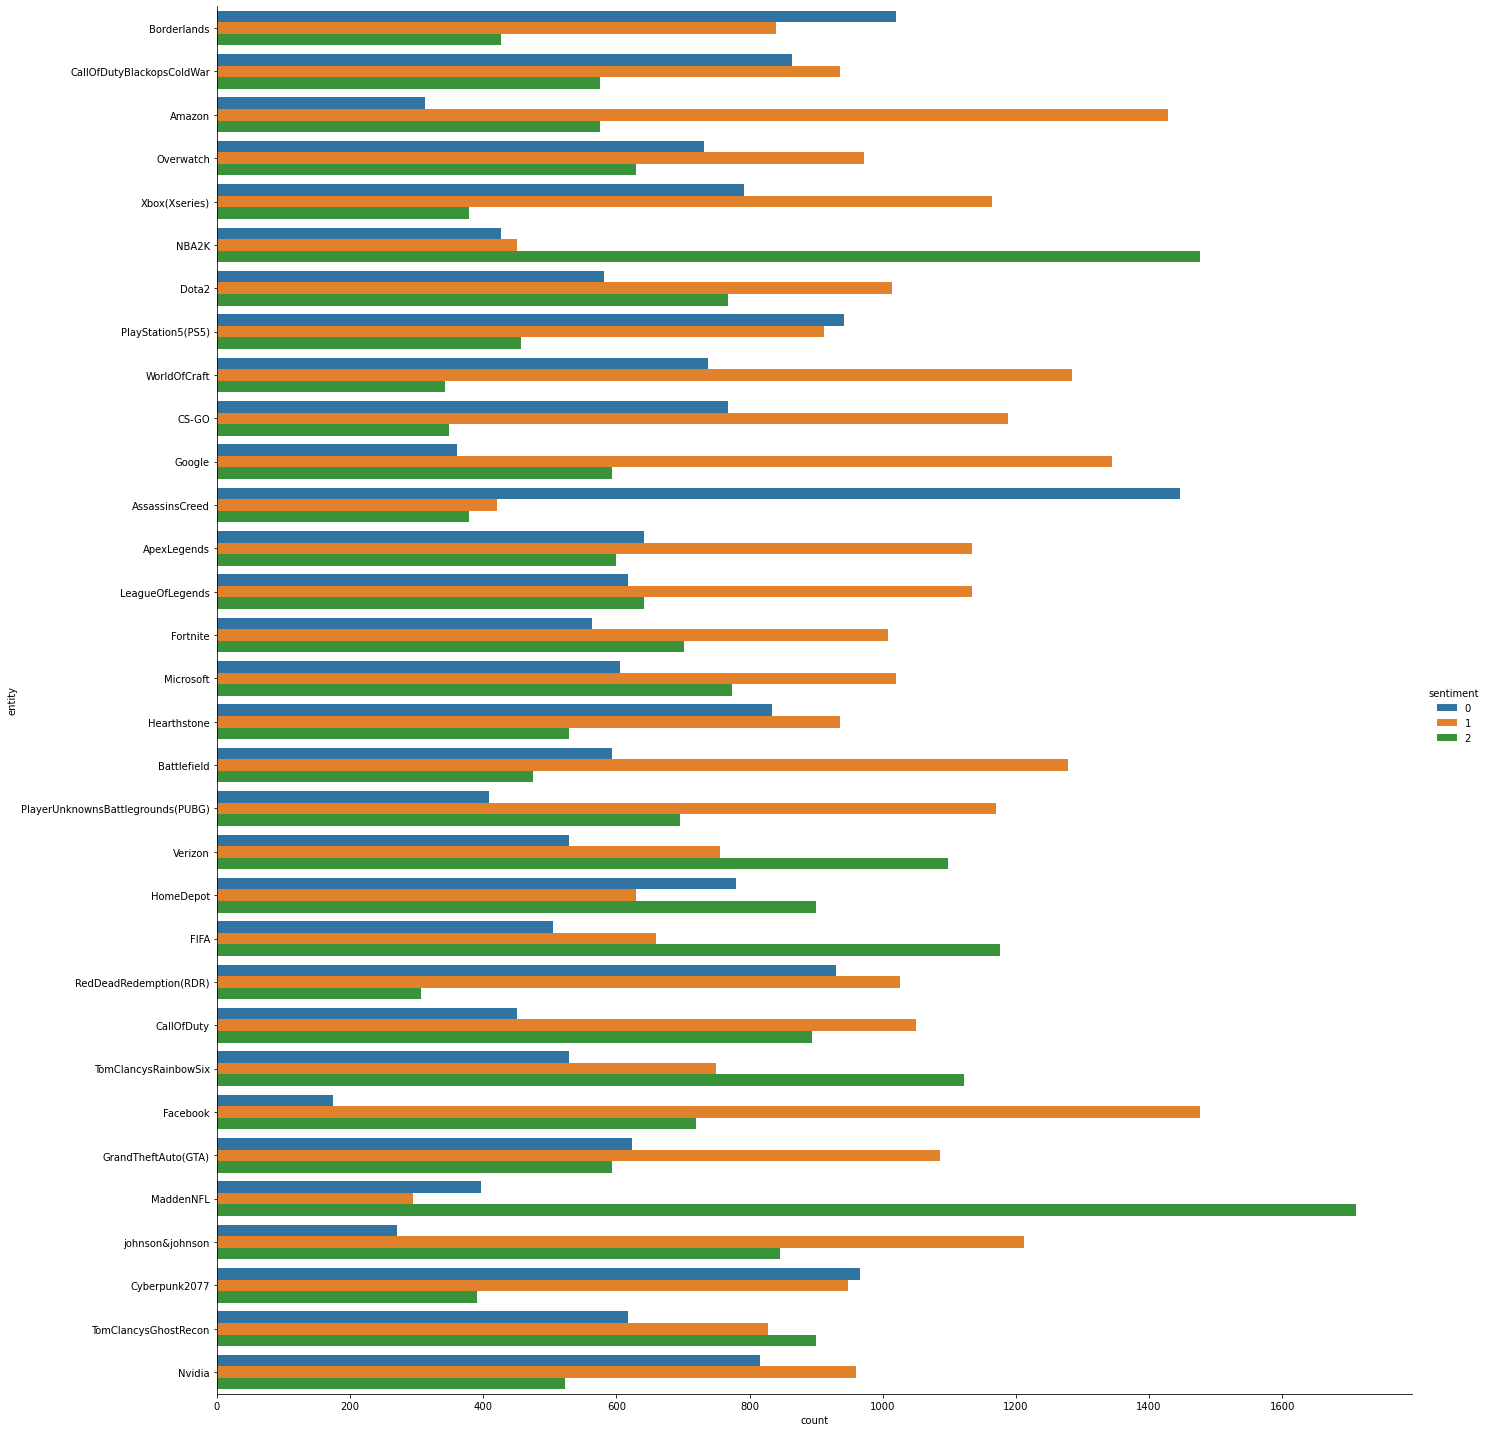

In [45]:
h = sns.catplot(y='entity', hue='sentiment', data=train_data, kind='count', height=20, aspect=1)

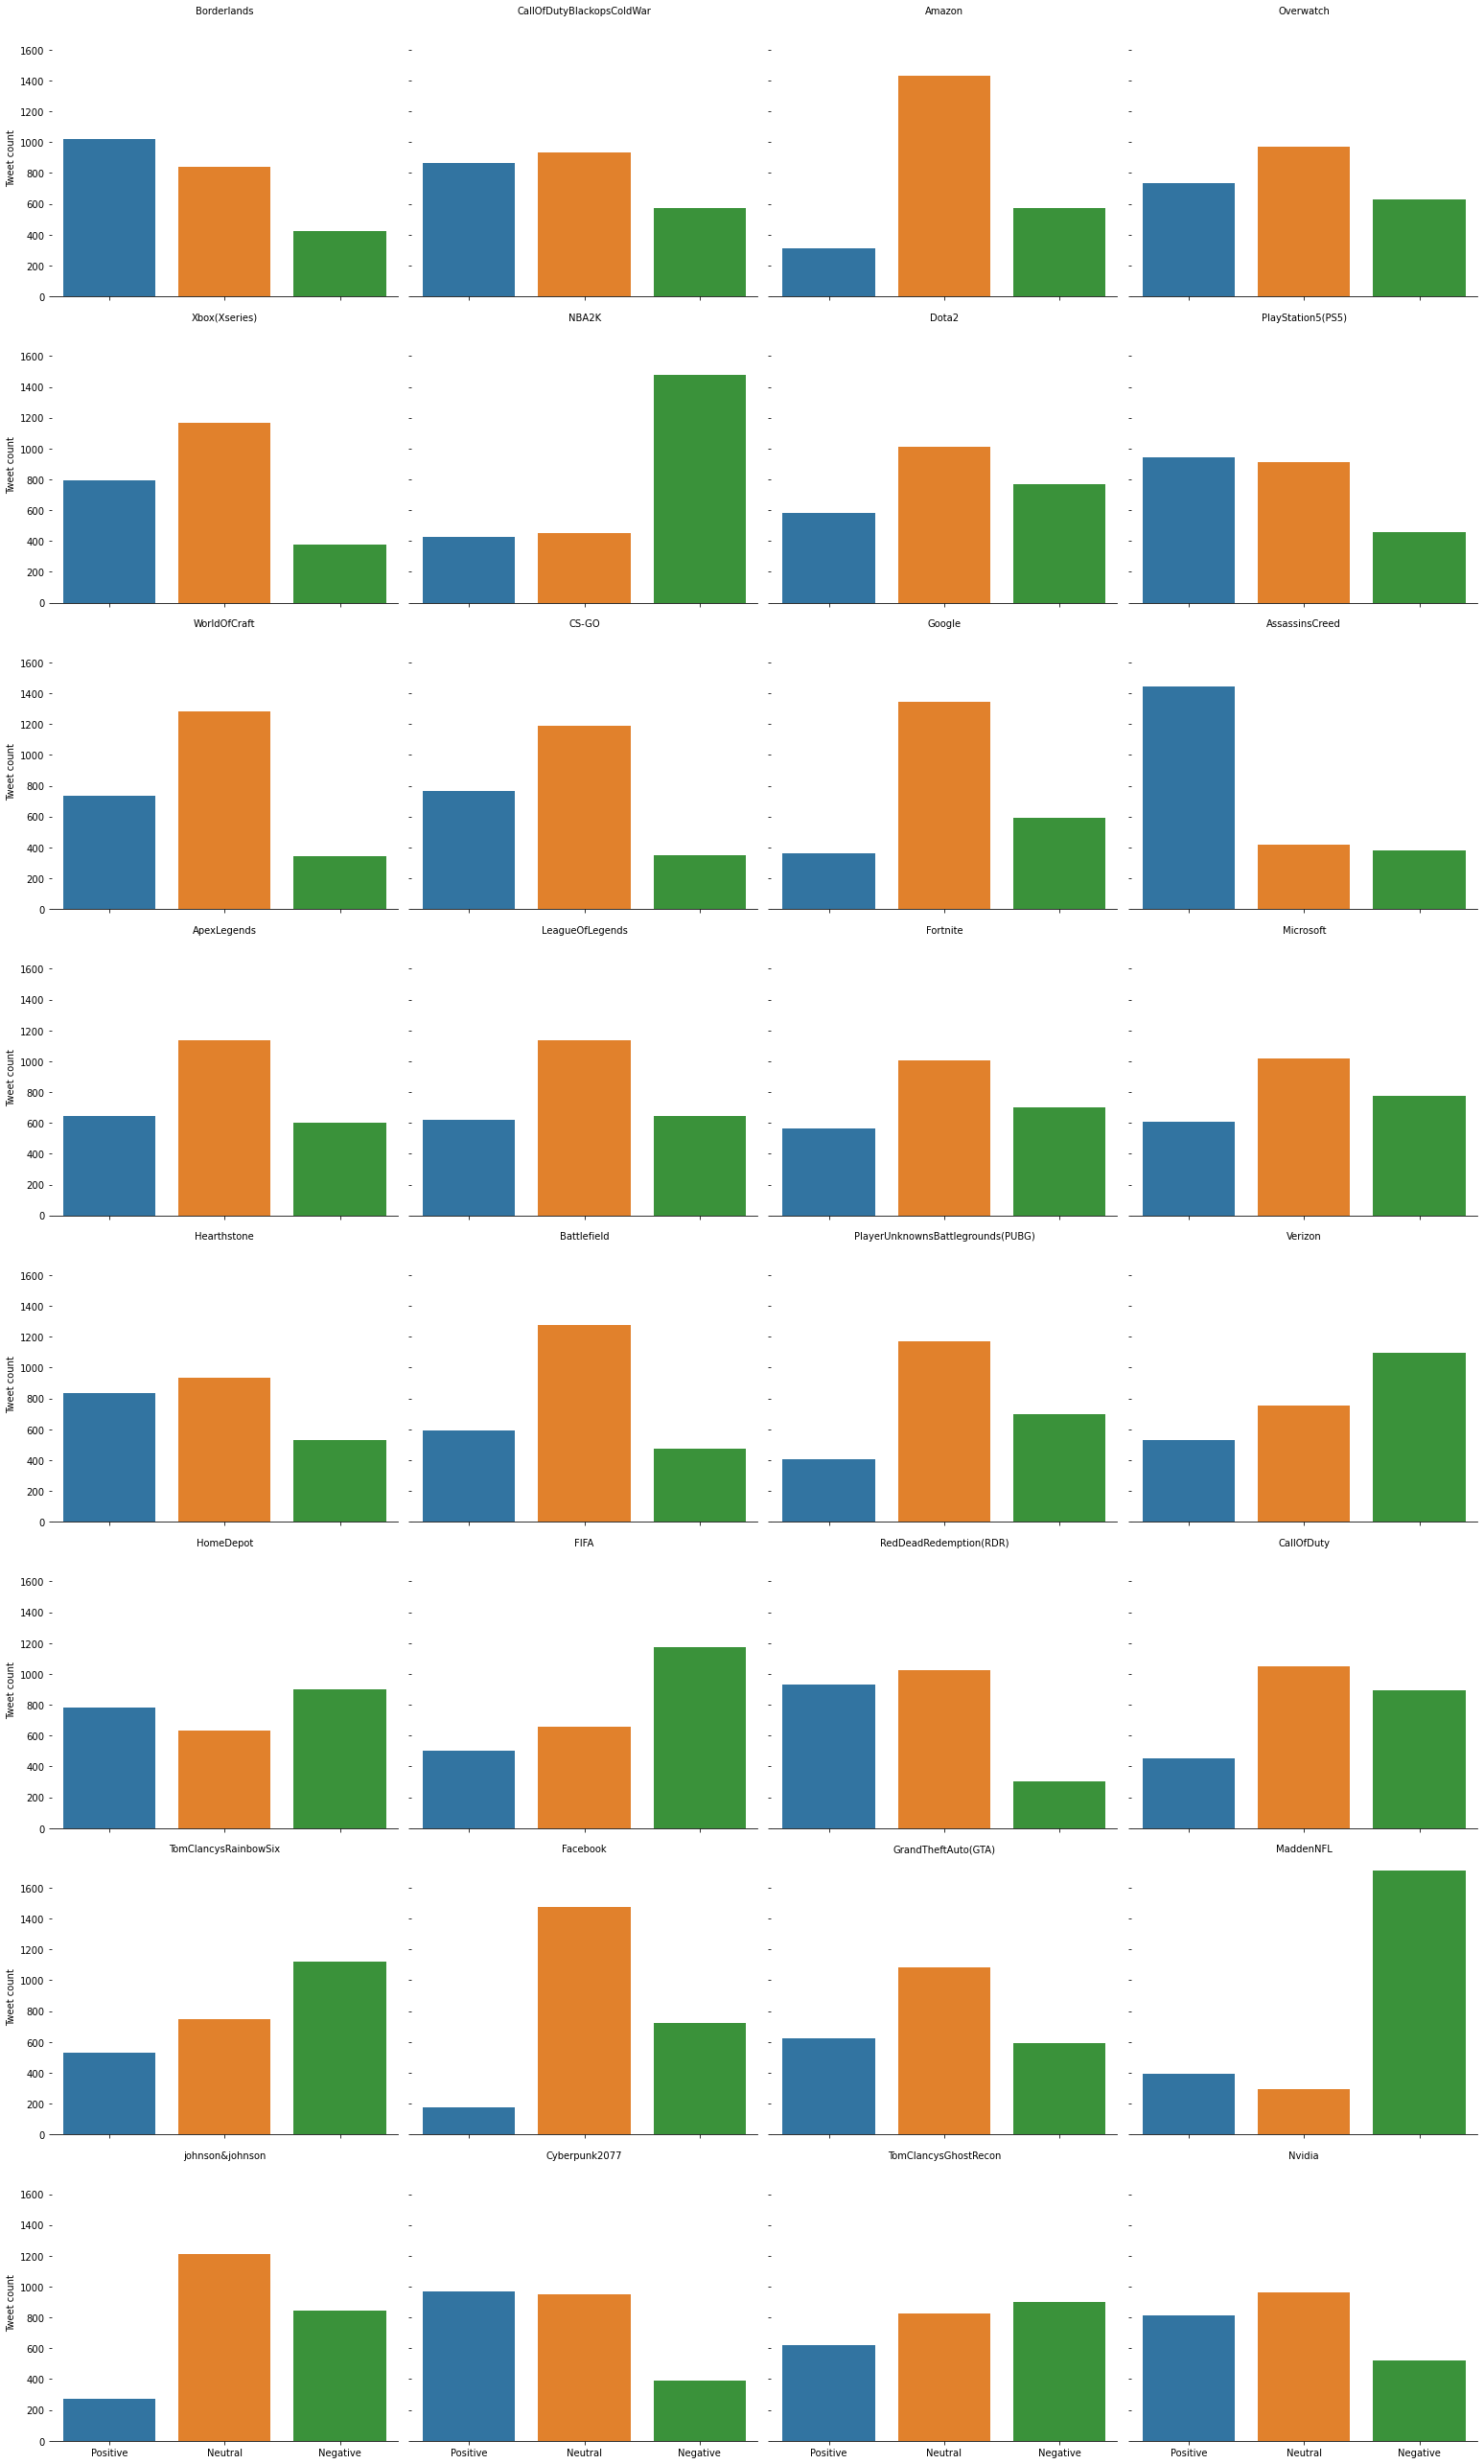

In [46]:
g = sns.catplot(x='sentiment', col='entity' , col_wrap=4, kind='count', data=train_data, height=4.5, aspect=1.2)


(g.set_axis_labels("", "Tweet count")
.set_xticklabels(["Positive", "Neutral", "Negative"])
.set_titles("{col_name}")
.despine(left=True)) 

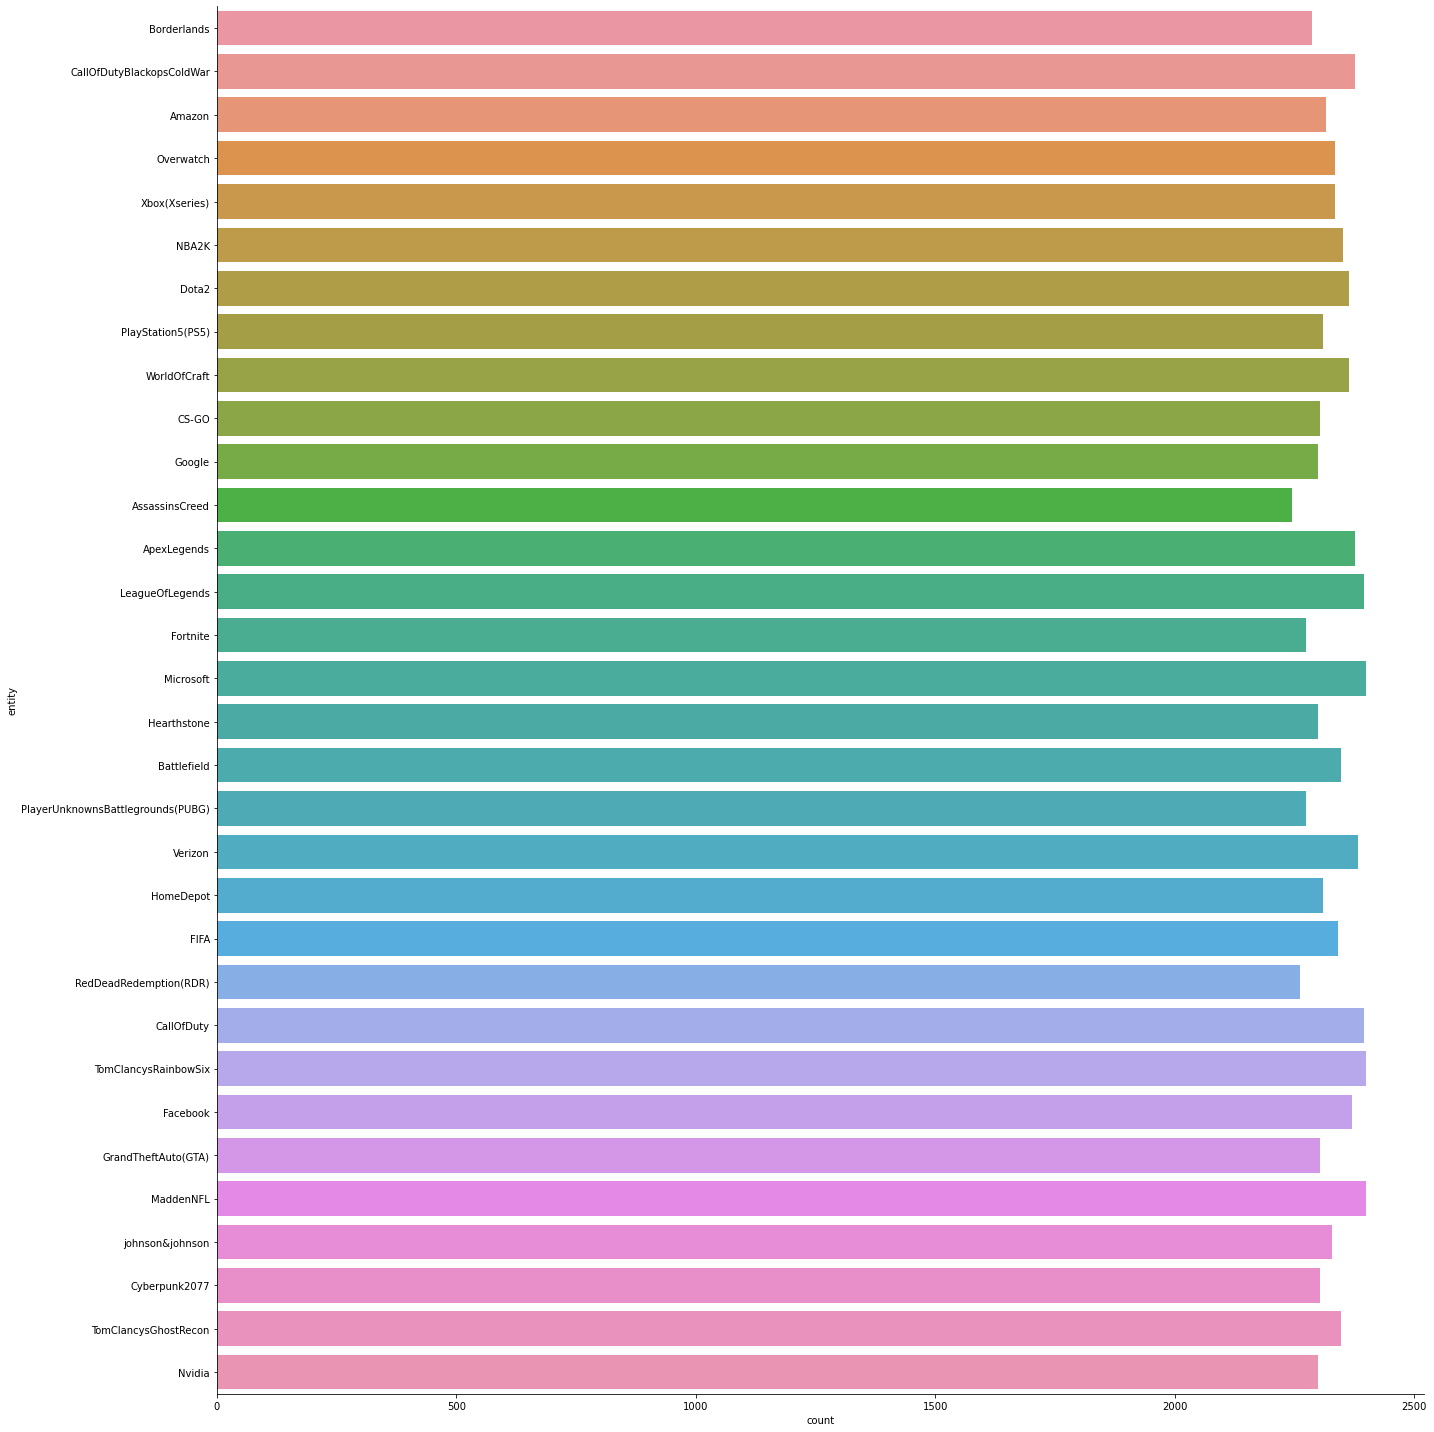

In [47]:
i = sns.catplot(y='entity', data=train_data, height=20, kind='count') 

In [10]:
train_data = train_data.rename(columns={'sentiment':'Class'})
test_data = test_data.rename(columns={'sentiment':'Class'})

In [11]:
# Zobaczmy sobie najczęściej występujące słowa w klasach słów pozytywnych, neutralnych, negatywnych i irrelevant

import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Neutralne tweety
neutral_list = list(map(str, train_data [train_data['Class'] == 0]['content']))

neutral_words = " ".join(neutral_list)
neutral_plot = WordCloud(width = 512, height = 512).generate(neutral_words)

# Pozytywne tweety
positive_list = list(map(str, train_data [train_data['Class'] == 1]['content']))

positive_words = " ".join(positive_list)
positive_plot = WordCloud(width = 512, height = 512).generate(positive_words)

# Negatywne tweety
negative_list = list(map(str, train_data [train_data['Class'] == 2]['content']))

negative_words = " ".join(negative_list)
negative_plot = WordCloud(width = 512, height = 512).generate(negative_words)

plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

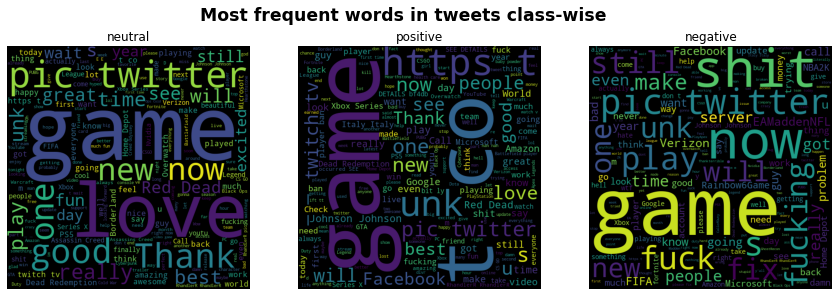

In [12]:
images = [neutral_plot, positive_plot, negative_plot]
image_names = ['neutral', 'positive', 'negative']


plt.figure(figsize=(20,5))
plt.suptitle('Most frequent words in tweets class-wise',y = 0.95, x = 0.4, weight='heavy', size='xx-large')
columns = 4
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.title(image_names[i])
    plt.imshow(image)

### Rozdzielamy na dane wejściowe i wyjściowe

Po tym zmieniamy komórki ze stringami na floaty za pomocą Vectorizera

In [13]:
from sklearn.model_selection import train_test_split

X_train = train_data.drop(columns='Class')
y_train = np.asarray(train_data['Class']).reshape(-1, 1).ravel()
y_train = y_train.astype('int')

X_test = test_data.drop(columns='Class')
y_test = np.asarray(test_data['Class']).reshape(-1, 1).ravel()
y_test = y_test.astype('int')

### Aby polepszyć wyniki klasyfikatorów poddajemy dane stemmingowi

Jednak jako, że jedna z naszych kolumn zawiera tylko nazwy gier/tematów o których jest pisane, to stemmingowi chcemy poddać jedynie kolumnę z treścią tweetów, bo to tam szukanie słów o wspólnych korzeniach znaczeniowych będzie mieć znaczenie

In [14]:
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

words = stopwords.words("english")
train_data['cleaned'] = train_data['content'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", str(x)).split() if i not in words]).lower())
test_data['cleaned'] = test_data['content'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", str(x)).split() if i not in words]).lower())

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

Teraz jak już mamy zwizualizowane dane i po stemmingu, to przekodujmy je na język zrozumiały przez maszynę, tj. wektory cech.

 W tym celu użyjemy funkcji *TfidfVectorizer*

In [15]:
entities_train = train_data['entity']
contents_train = train_data['cleaned']

entities_test = test_data['entity']
contents_test = test_data['cleaned']

In [16]:
# Dopasowanie i wektoryzowanie dla danych treningowych wraz ze stemmingiem

vectorizer_text =  TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2)) # stwórz instancje obiektu CountVectorizer dla kodowania tekstu tweetów
vectorizer_instances = CountVectorizer() # stwórz instancje obiektu CountVectorizer dla kodowania instancji
entities_train = vectorizer_instances.fit_transform(entities_train) # naucz vectorizer słownika i przetransformuj dane uczące (kolumna instnacji)
contents_train = vectorizer_text.fit_transform(contents_train) # naucz vectorizer słownika i przetransformuj dane uczące (kolumna treści)

X_train = hstack((entities_train, contents_train))

# Wektoryzowanie i przetransformowanie danych testowych korzystając ze słownika stworzonego na bazie danych treningowych

entities_test = vectorizer_instances.transform(entities_test) # naucz vectorizer słownika i przetransformuj dane uczące (kolumna instnacji)
contents_test = vectorizer_text.transform(contents_test) # naucz vectorizer słownika i przetransformuj dane uczące (kolumna treści)

X_test = hstack((entities_test, contents_test))

X_train = hstack((entities_train, contents_train))


In [17]:
print("Dane treningowe: n_samples: %d, n_features: %d" % X_train.shape)

Dane treningowe: n_samples: 74682, n_features: 103543


Odwrotne mapowanie cech na słowa

In [18]:
# # Odwrotne mapowanie tweetów na słowa

# Dla kolumny z tekstem tweetów

feature_names_text = vectorizer_text.get_feature_names_out()
feature_names_text = np.asarray(feature_names_text)

# Dla kolumny z tematami

feature_names_instances = vectorizer_instances.get_feature_names_out()
feature_names_instances = np.asarray(feature_names_instances)


## Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB

scoring = {"Precision": 'precision_weighted', "Accuracy": 'recall_weighted', "MCC": make_scorer(metrics.matthews_corrcoef)}

model_NB = MultinomialNB()

grid_values = {'alpha': np.linspace(0.5, 1.5, 6),
  'fit_prior': [True, False],}

# Optymalizacja hiperparametrów przez Cross Walidację
model_NB = GridSearchCV(model_NB, param_grid=grid_values, n_jobs=-1,
    return_train_score=True, refit='Precision', scoring=scoring)

model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

accur = accuracy_score(y_test, y_pred) # dokładność
print("Dokładność: %0.3f" % accur)
print("Classification report:") # wypisz raport klasyfikacji 
print(classification_report(y_test, y_pred))

print("Macierz błędów") # wypisz macierz (confusion matrix)
print(confusion_matrix(y_test, y_pred))

MCC = metrics.matthews_corrcoef(y_test, y_pred)
BACC = metrics.balanced_accuracy_score(y_test, y_pred)
print('MCC =  {m:.3f}, Balanced ACC = {b:.3f}  '.format(m=MCC, b=BACC))

Dokładność: 0.908
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       277
           1       0.89      0.96      0.92       457
           2       0.91      0.88      0.90       266

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.91      0.91      1000

Macierz błędów
[[236  29  12]
 [  9 438  10]
 [  8  24 234]]
MCC =  0.857, Balanced ACC = 0.897  


In [20]:
# Cross-Validation

scoring = {"Precision": 'precision_weighted', "Accuracy": 'recall_weighted', "MCC": make_scorer(metrics.matthews_corrcoef)}
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(model_NB, X_train, y_train, n_jobs=-1, scoring=scoring, verbose=True, cv=strat_k_fold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores["test_Accuracy"].mean(), scores["test_Accuracy"].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores["test_Precision"].mean(), scores["test_Precision"].std() * 2))
print("MCC: %0.2f (+/- %0.2f)" % (scores["test_MCC"].mean(), scores["test_MCC"].std() * 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.7s remaining:    3.8s


Accuracy: 0.83 (+/- 0.01)
Precision: 0.84 (+/- 0.01)
MCC: 0.74 (+/- 0.01)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished


## SVM

In [21]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.ensemble import BaggingClassifier

Do SVM już musimy bezwzględnie przeskalować nasze dane

In [22]:
entities_train = train_data['entity']
contents_train = train_data['cleaned']

entities_test = test_data['entity']
contents_test = test_data['cleaned']

# Dopasowanie i wektoryzowanie dla danych treningowych wraz ze stemmingiem

vectorizer_text =  TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2)) # stwórz instancje obiektu CountVectorizer dla kodowania tekstu tweetów
vectorizer_instances = CountVectorizer() # stwórz instancje obiektu CountVectorizer dla kodowania instancji
entities_train = vectorizer_instances.fit_transform(entities_train) # naucz vectorizer słownika i przetransformuj dane uczące (kolumna instnacji)
contents_train = vectorizer_text.fit_transform(contents_train) # naucz vectorizer słownika i przetransformuj dane uczące (kolumna treści)

X_train = hstack((entities_train, contents_train))

# Wektoryzowanie i przetransformowanie danych testowych korzystając ze słownika stworzonego na bazie danych treningowych

entities_test = vectorizer_instances.transform(entities_test) # naucz vectorizer słownika i przetransformuj dane uczące (kolumna instnacji)
contents_test = vectorizer_text.transform(contents_test) # naucz vectorizer słownika i przetransformuj dane uczące (kolumna treści)

X_test = hstack((entities_test, contents_test))


scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# # Odwrotne mapowanie tweetów na słowa

# Dla kolumny z tekstem tweetów

feature_names_text = vectorizer_text.get_feature_names_out()
feature_names_text = np.asarray(feature_names_text)

# Dla kolumny z tematami

feature_names_instances = vectorizer_instances.get_feature_names_out()
feature_names_instances = np.asarray(feature_names_instances)


In [23]:
model_SVM = LinearSVC(C=1E-5, dual=False, max_iter=10000)

grid_values = {'penalty': ['l2'], 'C': np.logspace(-10,2,12)}

# Optymalizacja hiperparametrów przez Cross Walidację
model_SVM = GridSearchCV(model_SVM, param_grid=grid_values, n_jobs=-1,
    return_train_score=True, refit="Precision", scoring=scoring, verbose=1)

model_SVM.fit(X_train, y_train)

print("C = {} ".format(model_SVM.best_params_['C']))

model_SVM = LinearSVC(dual=False, max_iter=10000, C=model_SVM.best_params_['C'])

model_SVM.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
C = 1.2328467394420635e-09 


LinearSVC(C=1.2328467394420635e-09, dual=False, max_iter=10000)

In [24]:
# Walidacja 

from sklearn import metrics

y_pred = model_SVM.predict(X_test)
accur = accuracy_score(y_test, y_pred) # dokładność
print("Dokładność: %0.3f" % accur)
print("Classification report:") # wypisz raport klasyfikacji 
print(classification_report(y_test, y_pred))

print("Macierz błędów") # wypisz macierz (confusion matrix)
print(confusion_matrix(y_test, y_pred))

MCC = metrics.matthews_corrcoef(y_test, y_pred)
BACC = metrics.balanced_accuracy_score(y_test, y_pred)
print('MCC =  {m:.3f}, Balanced ACC = {b:.3f}  '.format(m=MCC, b=BACC))

Dokładność: 0.956
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       277
           1       0.93      0.99      0.96       457
           2       0.97      0.95      0.96       266

    accuracy                           0.96      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.96      0.96      0.96      1000

Macierz błędów
[[250  20   7]
 [  2 454   1]
 [  1  13 252]]
MCC =  0.932, Balanced ACC = 0.948  


Dostajemy bardzo dobry wynik, skuteczność na poziomie 94%

In [25]:
# Cross-Validation

strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(model_SVM, X_train, y_train, n_jobs=-1, scoring=scoring, verbose=True, cv=strat_k_fold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores["test_Accuracy"].mean(), scores["test_Accuracy"].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores["test_Precision"].mean(), scores["test_Precision"].std() * 2))
print("MCC: %0.2f (+/- %0.2f)" % (scores["test_MCC"].mean(), scores["test_MCC"].std() * 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Accuracy: 0.91 (+/- 0.01)
Precision: 0.91 (+/- 0.01)
MCC: 0.86 (+/- 0.01)


## Regresja Logistyczna

In [26]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(solver = 'lbfgs', max_iter=10000, C=1E-5)

grid_values = {'penalty': ['l2'], 'C': np.logspace(-10, 2, num=10)}

# Optymalizacja hiperparametrów przez Cross Walidację
model_log = GridSearchCV(model_log, param_grid=grid_values, n_jobs=-1, verbose=4, scoring=scoring,
    refit="Precision",
    return_train_score=True, 
    error_score='raise',
    )

model_log.fit(X_train, y_train)

print("C = {} ".format(model_log.best_params_['C']))

model_log = LogisticRegression(solver = 'lbfgs', max_iter=10000, C=model_log.best_params_['C'])

model_log.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/k4cp3rskiii/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


C = 2.1544346900318823e-05 


LogisticRegression(C=2.1544346900318823e-05, max_iter=10000)

In [27]:
y_pred = model_log.predict(X_test)  

accur = accuracy_score(y_test, y_pred) # dokładność
print("Dokładność: %0.3f" % accur)
print("Classification report:") # wypisz raport klasyfikacji 
print(classification_report(y_test, y_pred))

print("Macierz błędów") # wypisz macierz (confusion matrix)
print(confusion_matrix(y_test, y_pred))

MCC = metrics.matthews_corrcoef(y_test, y_pred)
BACC = metrics.balanced_accuracy_score(y_test, y_pred)
print('MCC =  {m:.3f}, Balanced ACC = {b:.3f}  '.format(m=MCC, b=BACC))

Dokładność: 0.973
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       277
           1       0.98      0.98      0.98       457
           2       0.97      0.97      0.97       266

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

Macierz błędów
[[264   7   6]
 [  4 450   3]
 [  3   4 259]]
MCC =  0.958, Balanced ACC = 0.970  


In [28]:
# Cross-Validation

strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(model_log, X_train, y_train, n_jobs=-1, scoring=scoring, verbose=True, cv=strat_k_fold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores["test_Accuracy"].mean(), scores["test_Accuracy"].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores["test_Precision"].mean(), scores["test_Precision"].std() * 2))
print("MCC: %0.2f (+/- %0.2f)" % (scores["test_MCC"].mean(), scores["test_MCC"].std() * 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.5s remaining:    3.0s


Accuracy: 0.94 (+/- 0.01)
Precision: 0.94 (+/- 0.01)
MCC: 0.91 (+/- 0.01)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished


## DecissionTreeClassifier

In [29]:
from sklearn import tree

# Deklarujemy klasyfikator
model_tree = tree.DecisionTreeClassifier()
# Fitujemy do danych treningowych
model_tree = model_tree.fit(X_train, y_train)

Poniżej wizualizacja drzewa decyzyjnego. Jest to wielki plik, odkomentowanie na własną odpowiedzialność

In [30]:
# from IPython.display import Image 

# from six import StringIO
# import pydot 

# dot_data = StringIO()  
# tree.export_graphviz(model_tree, out_file=dot_data,  
#                          class_names=['Neutral', 'Positive', 'Negative'],  
#                          filled=True, rounded=True,  
#                          special_characters=True) 
# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph[0].create_png())

In [31]:
y_pred = model_tree.predict(X_test)  

accur = accuracy_score(y_test, y_pred) # dokładność
print("Dokładność: %0.3f" % accur)
print("Classification report:") # wypisz raport klasyfikacji 
print(classification_report(y_test, y_pred))

print("Macierz błędów") # wypisz macierz (confusion matrix)
print(confusion_matrix(y_test, y_pred))

MCC = metrics.matthews_corrcoef(y_test, y_pred)
BACC = metrics.balanced_accuracy_score(y_test, y_pred)
print('MCC =  {m:.3f}, Balanced ACC = {b:.3f}  '.format(m=MCC, b=BACC))

Dokładność: 0.918
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       277
           1       0.95      0.91      0.93       457
           2       0.88      0.97      0.92       266

    accuracy                           0.92      1000
   macro avg       0.91      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

Macierz błędów
[[246  19  12]
 [ 20 415  22]
 [  5   4 257]]
MCC =  0.874, Balanced ACC = 0.921  


In [32]:
# Cross-Validation

strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(model_tree, X_train, y_train, n_jobs=-1, scoring=scoring, verbose=True, cv=strat_k_fold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores["test_Accuracy"].mean(), scores["test_Accuracy"].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores["test_Precision"].mean(), scores["test_Precision"].std() * 2))
print("MCC: %0.2f (+/- %0.2f)" % (scores["test_MCC"].mean(), scores["test_MCC"].std() * 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   35.9s remaining:   23.9s


Accuracy: 0.86 (+/- 0.01)
Precision: 0.86 (+/- 0.01)
MCC: 0.78 (+/- 0.01)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   54.1s finished


In [33]:
print("Elapsed time\n--- %s seconds ---" % (time.time() - start_time))

Elapsed time
--- 979.5384411811829 seconds ---


## Porównanie modeli

In [34]:
#  Naive Bayes

y_pred = model_NB.predict(X_test)
MCC = metrics.matthews_corrcoef(y_test, y_pred)
BACC = metrics.balanced_accuracy_score(y_test, y_pred)
print('Bayes:                MCC =  {m:.3f}, Balanced ACC = {b:.3f}  '.format(m=MCC, b=BACC))

y_pred = model_SVM.predict(X_test)
MCC = metrics.matthews_corrcoef(y_test, y_pred)
BACC = metrics.balanced_accuracy_score(y_test, y_pred)
print('SVM:                  MCC =  {m:.3f}, Balanced ACC = {b:.3f}  '.format(m=MCC, b=BACC))

y_pred = model_log.predict(X_test)
MCC = metrics.matthews_corrcoef(y_test, y_pred)
BACC = metrics.balanced_accuracy_score(y_test, y_pred)
print('Regresja Logistyczna: MCC =  {m:.3f}, Balanced ACC = {b:.3f}  '.format(m=MCC, b=BACC))

y_pred = model_tree.predict(X_test)
MCC = metrics.matthews_corrcoef(y_test, y_pred)
BACC = metrics.balanced_accuracy_score(y_test, y_pred)
print('Tree Classifier:      MCC =  {m:.3f}, Balanced ACC = {b:.3f}  '.format(m=MCC, b=BACC))


Bayes:                MCC =  0.947, Balanced ACC = 0.966  
SVM:                  MCC =  0.932, Balanced ACC = 0.948  
Regresja Logistyczna: MCC =  0.958, Balanced ACC = 0.970  
Tree Classifier:      MCC =  0.874, Balanced ACC = 0.921  


---
Przy porównaniu modeli konkurencję wygrywa model regresji logistycznej, który wygrywa pod kątem każdej z matryk:  
- Osiąga średnio 97% dokładności na zbiorze testowym  
- Ma najwyższy współczynnik korelacji Matthews (MCC), który jest jednym z bardziej obiektywnych wskaźników z racji niewrażliwości na dysproporcję danych. Dla tego wskaźnika wartość 1 oznacza idealną klasyfikację i nasz klasyfikatow jest bardzo blisko tej wartości
---

---
### Porównanie z ekspertami

Porównanie wytrenowanego modelu z zespołem ekspertów ma się tak:
- Osiąga on uśrednioną dokładność porównywalną z ekspertami jeśli nie lepszą (przy CV na zbiorze treningowym jest to 94%, na zbiorze testowym 97%)
- Zrobienie predykcji o nie gorszym wyniku zajmuje mu sekundy czas ten bardzo dobrze się skaluje wraz ze wzrostem wielkości zbioru do oceny, podczas gdy dla grona ekspertów skaluje się to dużo gorzej
- Po wytrenowaniu modelu zrobienie predykcji nic nie kosztuje, a czas ekspertów jest cenny i kosztuje pieniądze :)